# **Import Libraries**

In [0]:
# !wget https://sci2s.ugr.es/keel/dataset/data/imbalanced/shuttle-c0-vs-c4-5-fold.zip -O shuttle.zip
# !unzip shuttle.zip
import numpy as np, pandas as pd, seaborn as sns,  matplotlib.pyplot as plt, random
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state
from sklearn.metrics import recall_score,accuracy_score, precision_score, f1_score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics

In [0]:
# current directory , train and test data was also stored here
cd ..

/


**prepare data**


we read data and store in dataframe and csv file!

In [0]:

def prepare_data(path, csv_name, folds=True):
  
  if folds is False:
    datContent = [i.strip().split() for i in open(path).readlines()]
    shuttle_data = datContent[13:]

    for i in range(len(shuttle_data)):
      shuttle_data[i] = (shuttle_data[i][0].split(','))
  else:
    datContent = [i.strip().split(', ') for i in open(path).readlines()]
    shuttle_data = datContent[13:]


  df = pd.DataFrame(shuttle_data)
  df.columns = ['A1', 'A2','A3', 'A4','A5', 'A6','A7', 'A8', 'label']
  df.to_csv(csv_name, sep=',', na_rep='0')

  return df
# df = prepare_data("content/shuttle-c0-vs-c4.dat",'shuttle.csv',False)
df_1tra = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-1tra.dat",'shuttle_1tra.csv')
df_1tst = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-1tst.dat",'shuttle_1tst.csv')
df_2tra = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-2tra.dat",'shuttle_2tra.csv')
df_2tst = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-2tst.dat",'shuttle_2tst.csv')
df_3tra = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-3tra.dat",'shuttle_3tra.csv')
df_3tst = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-3tst.dat",'shuttle_3tst.csv')
df_4tra = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-4tra.dat",'shuttle_4tra.csv')
df_4tst = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-4tst.dat",'shuttle_4tst.csv')
df_5tra = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-5tra.dat",'shuttle_5tra.csv')
df_5tst = prepare_data("content/yeast-0-2-5-6_vs_3-7-8-9-5-5tst.dat",'shuttle_5tst.csv')

# data = pd.read_csv("shuttle.csv", sep=',', header='infer')
# X_data = data.loc[:,'A1':'A9']
# y_data = data.loc[:,'label']

In [0]:
# datContent = [i.strip().split(',') for i in open("/content/yeast-0-2-5-6_vs_3-7-8-9.dat").readlines()]
# dataset = datContent[13:]

# df = pd.DataFrame(dataset)
# df.columns = ['A1', 'A2','A3', 'A4','A5', 'A6','A7', 'A8', 'label']
# df.to_csv('dataset.csv', sep=',', na_rep='0')

In [0]:

tra1 = pd.read_csv("shuttle_1tra.csv", sep=',', header='infer')
tst1 = pd.read_csv("shuttle_1tst.csv", sep=',', header='infer')
X_tra1 = tra1.loc[:,'A1':'A8']
X_tst1 = tst1.loc[:,'A1':'A8']
y_tra1 = tra1.loc[:,'label']
y_tst1 = tst1.loc[:,'label']


tra2 = pd.read_csv("shuttle_2tra.csv", sep=',', header='infer')
tst2 = pd.read_csv("shuttle_2tst.csv", sep=',', header='infer')

X_tra2 = tra2.loc[:,'A1':'A8']
X_tst2 = tst2.loc[:,'A1':'A8']
y_tra2 = tra2.loc[:,'label']
y_tst2 = tst2.loc[:,'label']

tra3 = pd.read_csv("shuttle_3tra.csv", sep=',', header='infer')
tst3 = pd.read_csv("shuttle_3tst.csv", sep=',', header='infer')

X_tra3 = tra3.loc[:,'A1':'A8']
y_tra3 = tra3.loc[:,'label']
X_tst3 = tst3.loc[:,'A1':'A8']
y_tst3 = tst3.loc[:,'label']


tra4 = pd.read_csv("shuttle_4tra.csv", sep=',', header='infer')
tst4 = pd.read_csv("shuttle_4tst.csv", sep=',', header='infer')

X_tra4 = tra4.loc[:,'A1':'A8']
y_tra4 = tra4.loc[:,'label']
X_tst4 = tst4.loc[:,'A1':'A8']
y_tst4 = tst4.loc[:,'label']

tra5 = pd.read_csv("shuttle_5tra.csv", sep=',', header='infer')
tst5 = pd.read_csv("shuttle_5tst.csv", sep=',', header='infer')

X_tra5 = tra5.loc[:,'A1':'A8']
y_tra5 = tra5.loc[:,'label']
X_tst5 = tst5.loc[:,'A1':'A8']
y_tst5 = tst5.loc[:,'label']



# **Plotting Data**



we can see our data is imbalanced! and negative labels are majority

In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=df.index,
    y=df.label,
    mode='markers',
))

fig.show()


In [0]:
def numberize(alist):
  for i,n in enumerate(alist):
    if alist[i] == 'negative': alist[i] = 0
    elif alist[i] == 'positive': alist[i] = 1
  return alist

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


# **RUSBoost**

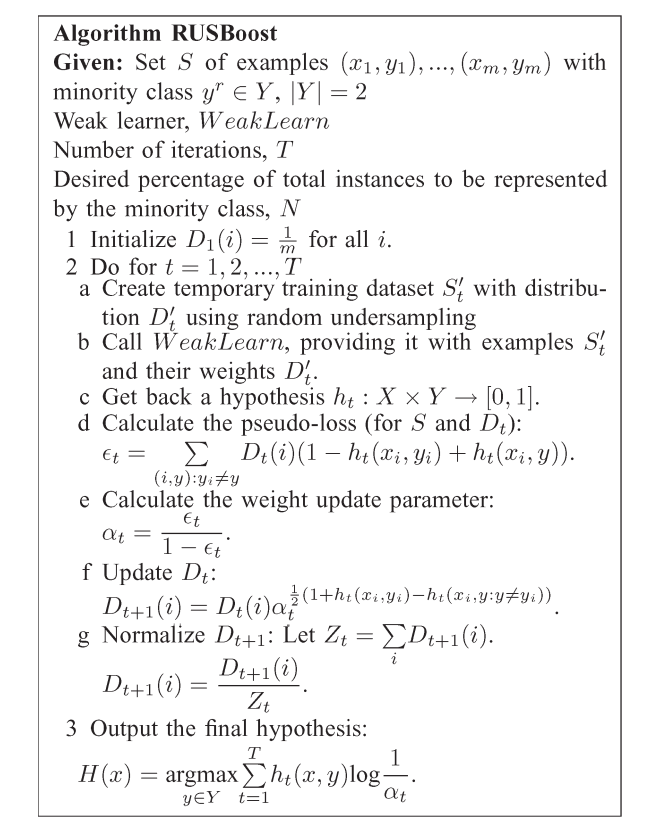

In [0]:
x_tra=[]
y_tra=[]
x_tst=[]
y_tst=[]
x_tra.append((X_tra1))
y_tra.append(y_tra1)
x_tra.append((X_tra2))
y_tra.append(y_tra2)
x_tra.append((X_tra3))
y_tra.append(y_tra3)
x_tra.append((X_tra4))
y_tra.append(y_tra4)
x_tra.append((X_tra5))
y_tra.append(y_tra5)

x_tst.append((X_tst1))
y_tst.append(y_tst1)
x_tst.append((X_tst2))
y_tst.append(y_tst2)
x_tst.append((X_tst3))
y_tst.append(y_tst3)
x_tst.append((X_tst4))
y_tst.append(y_tst4)
x_tst.append((X_tst5))
y_tst.append(y_tst5)

In [0]:
for i in range(5):
  numberize(y_tst[i])
  numberize(y_tra[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
def undersampling(X_train, y_train):
  diff = list(y_train).count(1) > list(y_train).count(0)
  # if the rate is 0.5, the numbers of both instances become equal by random under sampling. 
  rate = 0.5
  delete_list = [] #[[id,[train features],label], ...]
  keep_list = [] #[[id,[train features],label], ...]
  all_list = [] #[[id,[train features],label], ...]
  a = 0
  if  diff:
    # if we positive(1) labels > negative(0) labels
    for i in range(len(y_train)):
      if y_train[i] == 1:
        # if label of example is positive we move it in *delete list*
        delete_list.append([i, list(X_train.loc[i]), 1]) #[[id,[train features],label], ...]
      else:
        # if label of example is negative, we move it in *keep list*        
        keep_list.append([i, list(X_train.loc[i]), 0])
  else:
    # if we negative(0) labels > positive(1) labels
    for i in range(len(y_train)):
      if y_train[i] == 0:
        # if label of example is negative, we move it in **delete list*
        delete_list.append([i, list(X_train.loc[i]), 0])
      else:
        # if label of example is positive, we move it in *keep list*        
        keep_list.append([i, list(X_train.loc[i]), 1])  

  # while delete_list is bigger than rate(0,1)*all_list we choose random instance from delete list and then pop it 
  while len(delete_list) > rate*(len(delete_list)+len(keep_list)):
    k = random.choice(range(len(delete_list)))
    delete_list.pop(k)
        
  all_list = delete_list + keep_list
  return all_list

In [0]:
def RUSBoost(X_train, y_train,X_test, n_classifiers):
  major = -1
  D = (np.ones(len(X_train)) / len(X_train))
  classifiers = []
  loss = []
  alpha = []
  alpha2 = []

  e = 0
  r=0
  for n in range(n_classifiers): classifiers.append(RandomForestClassifier())
 
  for t in range(n_classifiers):

    #2a use undersampling method and create new training set
    newds = undersampling(X_train, y_train) # list([[instance],label])

    D2 = [D[ins[0]] for ins in newds]
    train = [ins[1] for ins in newds]
    train_label = [ins[2] for ins in newds]

    #2b calling weak learner (Rf or Dt) with sample data D that defiend in line 3 
    classifiers[t].fit(train, train_label, sample_weight=D2)

    #2c getting hypothesis with predict_proba() function 
    h_t = classifiers[t].predict_proba(train)

    #2d calculating loss
    for i in range(len(h_t)):
      if train_label[i] == 0:
        e +=  (D[i]*(1 - h_t[i,0]  + h_t[i,1]))
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))
      else:
        e += (D[i]*(1 - h_t[i,1]  + h_t[i,0]))
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))


    #2e calculate weight update parameter
    alpha.append(e/(1-e))
    alpha2.append(r/(1-r))
    
    #2f update D
    
    D = D*(r/(1-r))

    #2g normalize D 
    Z = np.sum(D)
    D = D/Z

  h_x = []
  
  #3 output final hypothesis
  for ins in np.array(X_test):
    sigma = np.zeros((1,2))
    for t in range(n_classifiers):
      sigma[0,0] += np.log(1/(alpha[t]))* (classifiers[t].predict_proba([ins])[0,0] )
      sigma[0,1] += np.log(1/(alpha[t]))* (classifiers[t].predict_proba([ins])[0,1] )
    h_x.append(np.argmax(sigma))

  # everything coded! lets calculate accuracy and recall :)

  return h_x
    

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8407960199004975
Recall for fold  0  :  0.8448895027624309
Precision for fold  0  :  0.85
F1-Measure for fold  0  :  0.85
----------------------------------

Accuracy for fold  1  :  0.8407960199004975
Recall for fold  1  :  0.800414364640884
Precision for fold  1  :  0.75
F1-Measure for fold  1  :  0.75
----------------------------------

Accuracy for fold  2  :  0.900497512437811
Recall for fold  2  :  0.8558011049723757
Precision for fold  2  :  0.8
F1-Measure for fold  2  :  0.8
----------------------------------

Accuracy for fold  3  :  0.8507462686567164
Recall for fold  3  :  0.7392265193370166
Precision for fold  3  :  0.6
F1-Measure for fold  3  :  0.6
----------------------------------

Accuracy for fold  4  :  0.79
Recall for fold  4  :  0.7191043908112824
Precision for fold  4  :  0.631578947368421
F1-Measure for fold  4  :  0.631578947368421
----------------------------------


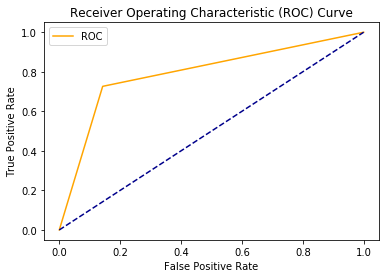

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8557213930348259
Recall for fold  0  :  0.8754143646408841
Precision for fold  0  :  0.9
F1-Measure for fold  0  :  0.9
----------------------------------

Accuracy for fold  1  :  0.8208955223880597
Recall for fold  1  :  0.7893646408839778
Precision for fold  1  :  0.75
F1-Measure for fold  1  :  0.75
----------------------------------

Accuracy for fold  2  :  0.8656716417910447
Recall for fold  2  :  0.8142265193370166
Precision for fold  2  :  0.75
F1-Measure for fold  2  :  0.75
----------------------------------

Accuracy for fold  3  :  0.8606965174129353
Recall for fold  3  :  0.7447513812154696
Precision for fold  3  :  0.6
F1-Measure for fold  3  :  0.6
----------------------------------

Accuracy for fold  4  :  0.85
Recall for fold  4  :  0.7758069206164583
Precision for fold  4  :  0.6842105263157895
F1-Measure for fold  4  :  0.6842105263157895
----------------------------------


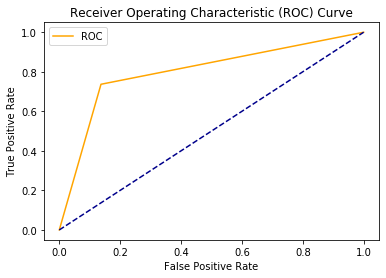

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8805970149253731
Recall for fold  0  :  0.8892265193370166
Precision for fold  0  :  0.9
F1-Measure for fold  0  :  0.9
----------------------------------

Accuracy for fold  1  :  0.8507462686567164
Recall for fold  1  :  0.805939226519337
Precision for fold  1  :  0.75
F1-Measure for fold  1  :  0.75
----------------------------------

Accuracy for fold  2  :  0.8756218905472637
Recall for fold  2  :  0.8419889502762431
Precision for fold  2  :  0.8
F1-Measure for fold  2  :  0.8
----------------------------------

Accuracy for fold  3  :  0.8557213930348259
Recall for fold  3  :  0.7419889502762431
Precision for fold  3  :  0.6
F1-Measure for fold  3  :  0.6
----------------------------------

Accuracy for fold  4  :  0.84
Recall for fold  4  :  0.7467287002035475
Precision for fold  4  :  0.631578947368421
F1-Measure for fold  4  :  0.631578947368421
----------------------------------


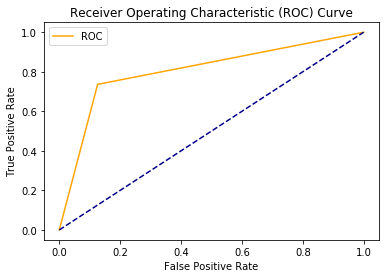

In [0]:
plotting_ac0 =[]
plotting_rec0 =[]

size = [1,2,3]

for y in size:
  overall_recall = 0.0
  overall_accuracy = 0.0
  fpr=0
  tpr=0
  print("---------------- New 5-Fold ------------------")
  for i in range(5):
    pred = RUSBoost(x_tra[i],y_tra[i],x_tst[i], y)
    ac = accuracy_score(list(y_tst[i]), pred)
    rec = recall_score(list(y_tst[i]), pred, average='macro', zero_division=0)
    prec = recall_score(list(y_tst[i]), pred)
    f1 = recall_score(list(y_tst[i]), pred)
    fp, tp, thresholds = roc_curve(list(y_tst[i]), pred)
    print("\nAccuracy for fold ",i, " : ",ac )
    print("Recall for fold ",i, " : ", rec)
    print("Precision for fold ",i, " : ", prec)
    print("F1-Measure for fold ",i, " : ", f1)
    print("----------------------------------")

    fpr = fpr + fp
    tpr = tpr + tp
    overall_recall += recall_score(list(y_tst[i]), pred, average='macro', zero_division=0)
    overall_accuracy += ac
  
  plot_roc_curve(fpr/5, tpr/5)
  plotting_rec0.append(overall_recall/5)
  plotting_ac0.append(overall_accuracy/5)


[1.0, 1.0, 1.0]


<BarContainer object of 3 artists>

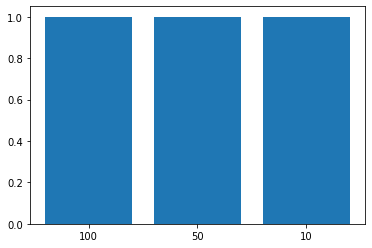

In [0]:
print(plotting_rec0)
plt.bar(['100','50','10'],plotting_rec0)

# **SMOTE**

In [0]:
'''
SMOTE(Synthetic Minority Over-Sampling Technique)
who is minority class? we enlarge that!
This is an over-sampling approach in which the minority class is oversampled by creating Synthetic examples.

Arguements:
            Minority:     data in minority class
            nn:             nearest neighber (5)
            smote_ratio:    imbalance ratio
            plotflag:       flag for plotting smoteDate or not

'''
def SMOTE(Minority, nn, smote_ratio):

    """
      n_nearest => number of nearest neighbors value is max(nn, smote_ratio) 
    """
    # if smote_ratio < nn then iterate only once else iterate enough times to create smote_ratio data
    if smote_ratio <= nn:
      gennum = 1
      n_nearest = smote_ratio
    else:
      gennum = int(smote_ratio/nn)
      n_nearest = nn
    

    """
      1) identify the nearest neighbours of each point
      2) remove first column because the first nearest neighbour is the same point for this reason we use nn+1 instead of nn
    """

    # finding k neighbors around each point in minority
    nbrs = NearestNeighbors(n_neighbors = nn+1).fit(Minority)  

    # extract distance and index of points 
    distances, indices = nbrs.kneighbors(Minority)

    distances = distances[:,1:nn+1]
    indices = indices[:,1:nn+1]

    """******************************************************************"""
    # initialise smotedata dataframe
    smotedata = pd.DataFrame(columns = Minority.columns)

    """******************************************************************"""
    # loop through all minority samples
    for row in range(0, len(Minority)):
      # shuffle the neighbours
      niter = np.arange(0, nn) # array([0, 1, 2, ... , nn])
      np.random.shuffle(niter)


      # n_nearest neighbours
      niter = niter[0:n_nearest]
      temp_neighbours = indices[row, niter]
    
      for i in range(1, gennum+1):                         
          for n in range(1,n_nearest+1):
            # find distance of each d point
            tempdistance = Minority.iloc[temp_neighbours[n-1],:] - Minority.iloc[row,:]

            # find a random point between this distance
            rand = random.uniform(0, 1)
            newpoint = Minority.iloc[row,:] + rand * tempdistance

            # add new point
            smotedata = smotedata.append(newpoint,ignore_index=True)
    """******************************************************************"""
      
    return smotedata

In [0]:
def doSmote(X_tra, y_tra, smote_rating):
  smoted = SMOTE(X_tra.loc[y_tra == 'positive', :], 5, smote_rating)
  X_smote = X_tra
  X_smote = X_smote.append(smoted, ignore_index=True)
  
  ytemp=  ['positive']*len(smoted)
  ytemp = pd.Series(ytemp)
  ysmote = y_tra.append(ytemp, ignore_index=True)

  return X_smote, ysmote

In [0]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

x_train.append(doSmote(X_tra1, y_tra1, (tra1['label'].value_counts().negative/tra1['label'].value_counts().positive))[0])
x_train.append(doSmote(X_tra2, y_tra2, (tra2['label'].value_counts().negative/tra2['label'].value_counts().positive))[0])
x_train.append(doSmote(X_tra3, y_tra3, (tra3['label'].value_counts().negative/tra3['label'].value_counts().positive))[0])
x_train.append(doSmote(X_tra4, y_tra4, (tra4['label'].value_counts().negative/tra4['label'].value_counts().positive))[0])
x_train.append(doSmote(X_tra5, y_tra5, (tra5['label'].value_counts().negative/tra5['label'].value_counts().positive))[0])
y_train.append(doSmote(X_tra1, y_tra1, (tra1['label'].value_counts().negative/tra1['label'].value_counts().positive))[1])
y_train.append(doSmote(X_tra2, y_tra2, (tra2['label'].value_counts().negative/tra2['label'].value_counts().positive))[1])
y_train.append(doSmote(X_tra3, y_tra3, (tra3['label'].value_counts().negative/tra3['label'].value_counts().positive))[1])
y_train.append(doSmote(X_tra4, y_tra4, (tra4['label'].value_counts().negative/tra4['label'].value_counts().positive))[1])
y_train.append(doSmote(X_tra5, y_tra5, (tra5['label'].value_counts().negative/tra5['label'].value_counts().positive))[1])


x_test.append(doSmote(X_tst1, y_tst1, (tst1['label'].value_counts().negative/tst1['label'].value_counts().positive))[0])
x_test.append(doSmote(X_tst2, y_tst2, (tst2['label'].value_counts().negative/tst2['label'].value_counts().positive))[0])
x_test.append(doSmote(X_tst3, y_tst3, (tst3['label'].value_counts().negative/tst3['label'].value_counts().positive))[0])
x_test.append(doSmote(X_tst4, y_tst4, (tst4['label'].value_counts().negative/tst4['label'].value_counts().positive))[0])
x_test.append(doSmote(X_tst5, y_tst5, (tst5['label'].value_counts().negative/tst5['label'].value_counts().positive))[0])
y_test.append(doSmote(X_tst1, y_tst1, (tst1['label'].value_counts().negative/tst1['label'].value_counts().positive))[1])
y_test.append(doSmote(X_tst2, y_tst2, (tst2['label'].value_counts().negative/tst2['label'].value_counts().positive))[1])
y_test.append(doSmote(X_tst3, y_tst3, (tst3['label'].value_counts().negative/tst3['label'].value_counts().positive))[1])
y_test.append(doSmote(X_tst4, y_tst4, (tst4['label'].value_counts().negative/tst4['label'].value_counts().positive))[1])
y_test.append(doSmote(X_tst5, y_tst5, (tst5['label'].value_counts().negative/tst5['label'].value_counts().positive))[1])


In [0]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=x_train[1].index,
    y=y_train[1],
    mode='markers',
))

fig.show()


# **SVM - RF**

Accuracy for fold  0  :  0.9003322259136213
Accuracy for fold  1  :  0.8571428571428571
Accuracy for fold  2  :  0.8438538205980066
Accuracy for fold  3  :  0.8106312292358804
Accuracy for fold  4  :  0.8
Avg Recall:  0.8154020063972085


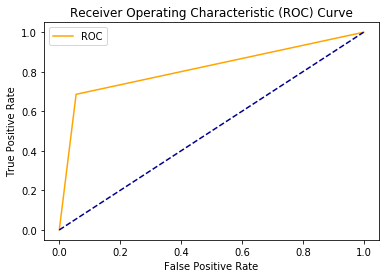

In [0]:
model = svm.SVC()

overall_recall = 0
fpr=0
tpr=0
for i in range(5):
  model.fit(np.array(x_train[i]),numberize(list(y_train[i])))
  pred = model.predict(x_test[i])
  print("Accuracy for fold ",i, " : ",accuracy_score(numberize(list(y_test[i])), pred))
  fp, tp, thresholds = roc_curve(numberize(list(y_test[i])), pred)
  fpr += fp
  tpr += tp
  overall_recall += recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
print("Avg Recall: ",overall_recall/5)
plot_roc_curve(fpr/5, tpr/5)



Accuracy for fold  0  :  0.8970099667774086
Accuracy for fold  1  :  0.867109634551495
Accuracy for fold  2  :  0.8305647840531561
Accuracy for fold  3  :  0.8305647840531561
Accuracy for fold  4  :  0.8
Avg Recall:  0.8129429582242901


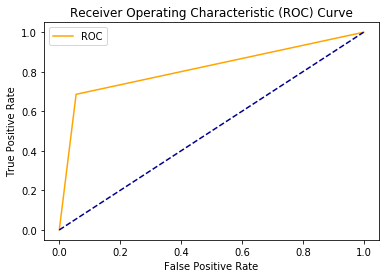

In [0]:
model = RandomForestClassifier()

overall_recall = 0
for i in range(5):
  model.fit(np.array(x_train[i]),numberize(list(y_train[i])))
  pred = model.predict(x_test[i])
  print("Accuracy for fold ",i, " : ",accuracy_score(numberize(list(y_test[i])), pred))
  fp, tp, thresholds = roc_curve(numberize(list(y_test[i])), pred)
  overall_recall += recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
print("Avg Recall: ",overall_recall/5)
plot_roc_curve(fpr/5, tpr/5)


# **ADABoostM2**

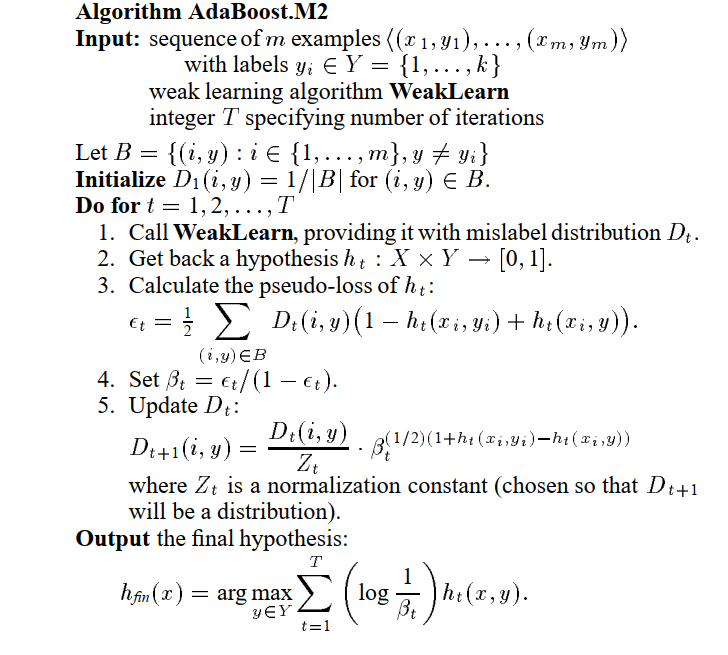

In [0]:
# online train and test :)
def AdaBoostM2(X_smoted, y_smoted,X_test, n_classifiers):
   
  D = (np.ones(len(X_smoted)) / len(X_smoted))
  classifiers = []
  loss = []
  beta = []
  alpha2=[]
  r=0
  updating = []
  e = 0
  for n in range(n_classifiers): classifiers.append(RandomForestClassifier(max_depth=1))
  for t in range(n_classifiers): 
    # 1
    classifiers[t].fit(X_smoted, y_smoted, sample_weight=D)

    # 3 1-h_ttrue + h_tfalse
    h_t = classifiers[t].predict_proba(X_smoted)
    
    for i in range(len(h_t)):
      if y_smoted[i] == 0:
        e +=  1/2(D[i]*(1 - h_t[i,0]  + h_t[i,1]))
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))
      else:
        e +=  1/2*(D[i]*(1 - h_t[i,1]  + h_t[i,0]))
            
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))


    loss.append(e/2)
    # 4
    beta.append(loss[t]/(1-loss[t]))
    # 5 update D
    D = D*(r/(1-r))



  prediction = []
  
  for ins in X_test:
    sigma = np.zeros((1,2))
    for t in range(n_classifiers):
      sigma[0,0] += np.log(1/beta[t])* classifiers[t].predict_proba([ins])[0,0]
      sigma[0,1] += np.log(1/beta[t])* classifiers[t].predict_proba([ins])[0,1]
    prediction.append(np.argmax(sigma))

  
  return prediction

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8239202657807309
Recall for fold  0  :  0.791804788213628
Precision for fold  0  :  0.6333333333333333
F1-Measure for fold  0  :  0.6333333333333333
----------------------------------

Accuracy for fold  1  :  0.8471760797342193
Recall for fold  1  :  0.8223756906077349
Precision for fold  1  :  0.7
F1-Measure for fold  1  :  0.7
----------------------------------

Accuracy for fold  2  :  0.8239202657807309
Recall for fold  2  :  0.7875920810313075
Precision for fold  2  :  0.6083333333333333
F1-Measure for fold  2  :  0.6083333333333333
----------------------------------

Accuracy for fold  3  :  0.813953488372093
Recall for fold  3  :  0.7736878453038674
Precision for fold  3  :  0.575
F1-Measure for fold  3  :  0.575
----------------------------------

Accuracy for fold  4  :  0.7254237288135593
Recall for fold  4  :  0.6674663177280217
Precision for fold  4  :  0.41228070175438597
F1-Measure for fold  4  : 

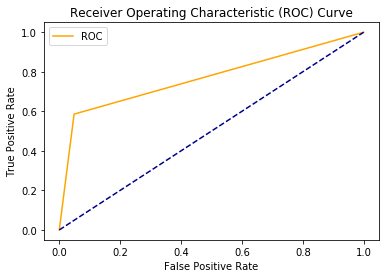

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8338870431893688
Recall for fold  0  :  0.8000920810313075
Precision for fold  0  :  0.6333333333333333
F1-Measure for fold  0  :  0.6333333333333333
----------------------------------

Accuracy for fold  1  :  0.8538205980066446
Recall for fold  1  :  0.8264963167587477
Precision for fold  1  :  0.6916666666666667
F1-Measure for fold  1  :  0.6916666666666667
----------------------------------

Accuracy for fold  2  :  0.8338870431893688
Recall for fold  2  :  0.8000920810313075
Precision for fold  2  :  0.6333333333333333
F1-Measure for fold  2  :  0.6333333333333333
----------------------------------

Accuracy for fold  3  :  0.8172757475083057
Recall for fold  3  :  0.777854511970534
Precision for fold  3  :  0.5833333333333334
F1-Measure for fold  3  :  0.5833333333333334
----------------------------------

Accuracy for fold  4  :  0.7220338983050848
Recall for fold  4  :  0.6663274207618494
Precision for f

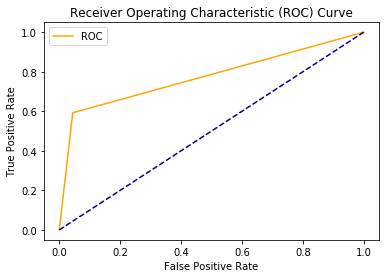

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8504983388704319
Recall for fold  0  :  0.820925414364641
Precision for fold  0  :  0.675
F1-Measure for fold  0  :  0.675
----------------------------------

Accuracy for fold  1  :  0.8471760797342193
Recall for fold  1  :  0.8167587476979742
Precision for fold  1  :  0.6666666666666666
F1-Measure for fold  1  :  0.6666666666666666
----------------------------------

Accuracy for fold  2  :  0.8272425249169435
Recall for fold  2  :  0.790354511970534
Precision for fold  2  :  0.6083333333333333
F1-Measure for fold  2  :  0.6083333333333333
----------------------------------

Accuracy for fold  3  :  0.8006644518272426
Recall for fold  3  :  0.7570211786372008
Precision for fold  3  :  0.5416666666666666
F1-Measure for fold  3  :  0.5416666666666666
----------------------------------

Accuracy for fold  4  :  0.7220338983050848
Recall for fold  4  :  0.6679509547349036
Precision for fold  4  :  0.42982456140350

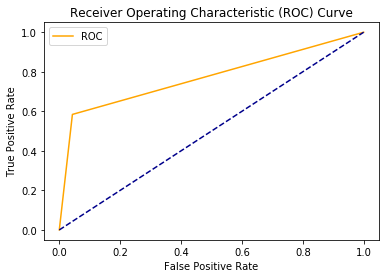

In [0]:

plotting_ac0 =[]
plotting_rec0 =[]

size = [1,10,100]

for y in size:
  overall_recall = 0.0
  overall_accuracy = 0.0
  fpr=0
  tpr=0
  print("---------------- New 5-Fold ------------------")
  for i in range(5):
    pred = AdaBoostM2(np.array(x_train[i]),y_train[i],np.array(x_test[i]), y)
    ac = accuracy_score(numberize(list(y_test[i])), pred)
    rec = recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
    prec = recall_score(numberize(list(y_test[i])), pred)
    f1 = recall_score(numberize(list(y_test[i])), pred)
    fp, tp, thresholds = roc_curve(numberize(list(y_test[i])), pred)
    print("\nAccuracy for fold ",i, " : ",ac )
    print("Recall for fold ",i, " : ", rec)
    print("Precision for fold ",i, " : ", prec)
    print("F1-Measure for fold ",i, " : ", f1)
    print("----------------------------------")

    fpr = fpr + fp
    tpr = tpr + tp
    overall_recall += recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
    overall_accuracy += ac
  
  plot_roc_curve(fpr/5, tpr/5)
  plotting_rec0.append(overall_recall/5)
  plotting_ac0.append(overall_accuracy/5)


[0.768585344576912, 0.7741724823107491, 0.7706021614810508]


<BarContainer object of 3 artists>

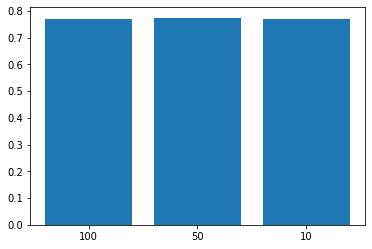

In [0]:
print(plotting_rec0)
plt.bar(['100','50','10'],plotting_rec0)

# **SMOTEBoost**

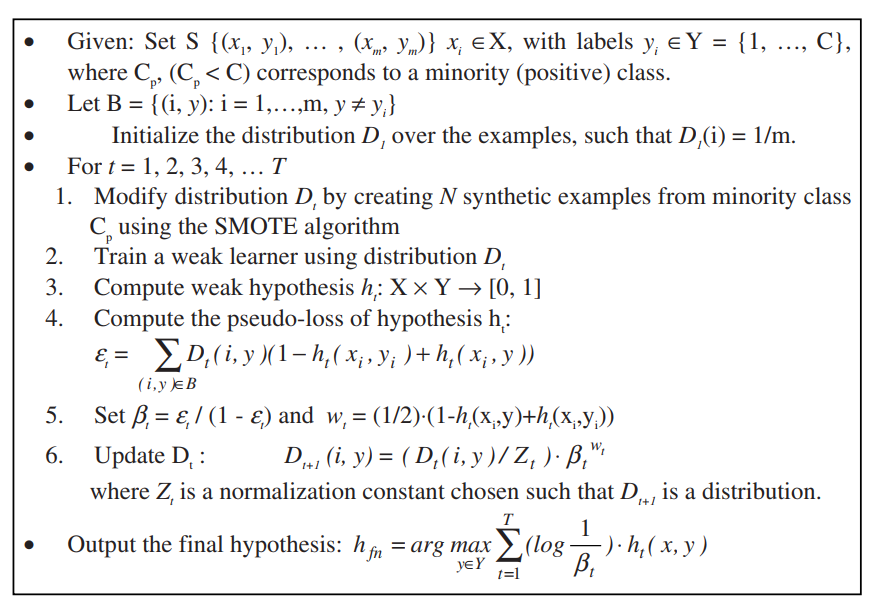

In [0]:
# online train and test :)
def SMOTE_Boost(X_smoted, y_smoted,X_test, n_classifiers):
   
  D = (np.ones(len(X_smoted)) / len(X_smoted))
  classifiers = []
  loss = []
  beta = []
  r=0
  alpha2=[]
  updating = []
  e = 0
  for n in range(n_classifiers): classifiers.append(RandomForestClassifier())
  for t in range(n_classifiers): 
    # 1
    classifiers[t].fit(X_smoted, y_smoted, sample_weight=D)

    # 3 1-h_ttrue + h_tfalse
    h_t = classifiers[t].predict_proba(X_smoted)
    
    for i in range(len(h_t)):
      if y_smoted[i] == 'negative':
        e +=  (D[i]*(1 - h_t[i,0]  + h_t[i,1]))
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))
      else:
        e += (D[i]*(1 - h_t[i,1]  + h_t[i,0]))
        r += (0.5*(1 + h_t[i,0]  - h_t[i,1]))


    
    # 4
    beta.append(e/(1-e))
    alpha2.append(r/(1-r))
    # 5 update D

    Z = np.sum(D)
    D = D*(r/(1-r))
    D = D/Z
    # print(D)
  prediction = []
  
  for ins in X_test:
    sigma = np.zeros((1,2))
    for t in range(n_classifiers):
      sigma[0,0] += np.log(1/(beta[t]))* (classifiers[t].predict_proba([ins])[0,0] )
      sigma[0,1] += np.log(1/(beta[t]))* (classifiers[t].predict_proba([ins])[0,1] )
    prediction.append(np.argmax(sigma))

  
  return prediction

# overall_recall = 0.0
# for i in range(5):
#   pred = SMOTE_Boost(np.array(x_train[i]),y_train[i],np.array(x_test[i]), 5)
#   print("\nAccuracy: ", accuracy_score(numberize(list(y_test[i])), pred))
#   print("Recall: ", recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0))
#   overall_recall += recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)


---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.9069767441860465
Recall for fold  0  :  0.8903545119705341
Precision for fold  0  :  0.8083333333333333
F1-Measure for fold  0  :  0.8083333333333333
----------------------------------

Accuracy for fold  1  :  0.8704318936877077
Recall for fold  1  :  0.847329650092081
Precision for fold  1  :  0.7333333333333333
F1-Measure for fold  1  :  0.7333333333333333
----------------------------------

Accuracy for fold  2  :  0.8305647840531561
Recall for fold  2  :  0.7945211786372007
Precision for fold  2  :  0.6166666666666667
F1-Measure for fold  2  :  0.6166666666666667
----------------------------------

Accuracy for fold  3  :  0.8272425249169435
Recall for fold  3  :  0.7875460405156538
Precision for fold  3  :  0.5916666666666667
F1-Measure for fold  3  :  0.5916666666666667
----------------------------------

Accuracy for fold  4  :  0.7830508474576271
Recall for fold  4  :  0.7404041872637395
Precision for f

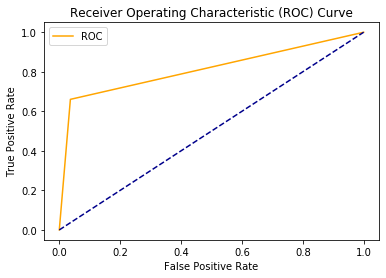

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.9036544850498339
Recall for fold  0  :  0.8861878453038674
Precision for fold  0  :  0.8
F1-Measure for fold  0  :  0.8
----------------------------------

Accuracy for fold  1  :  0.8637873754152824
Recall for fold  1  :  0.8404005524861878
Precision for fold  1  :  0.725
F1-Measure for fold  1  :  0.725
----------------------------------

Accuracy for fold  2  :  0.8338870431893688
Recall for fold  2  :  0.7986878453038674
Precision for fold  2  :  0.625
F1-Measure for fold  2  :  0.625
----------------------------------

Accuracy for fold  3  :  0.8272425249169435
Recall for fold  3  :  0.7875460405156538
Precision for fold  3  :  0.5916666666666667
F1-Measure for fold  3  :  0.5916666666666667
----------------------------------

Accuracy for fold  4  :  0.8067796610169492
Recall for fold  4  :  0.7613647378113793
Precision for fold  4  :  0.5614035087719298
F1-Measure for fold  4  :  0.5614035087719298
-----

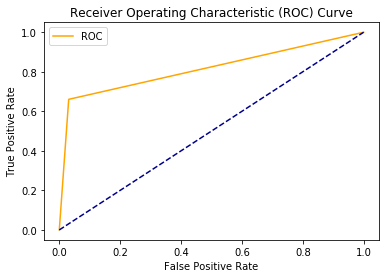

---------------- New 5-Fold ------------------

Accuracy for fold  0  :  0.8870431893687708
Recall for fold  0  :  0.8667587476979742
Precision for fold  0  :  0.7666666666666667
F1-Measure for fold  0  :  0.7666666666666667
----------------------------------

Accuracy for fold  1  :  0.8637873754152824
Recall for fold  1  :  0.8404005524861878
Precision for fold  1  :  0.725
F1-Measure for fold  1  :  0.725
----------------------------------

Accuracy for fold  2  :  0.8338870431893688
Recall for fold  2  :  0.7986878453038674
Precision for fold  2  :  0.625
F1-Measure for fold  2  :  0.625
----------------------------------

Accuracy for fold  3  :  0.8305647840531561
Recall for fold  3  :  0.7917127071823205
Precision for fold  3  :  0.6
F1-Measure for fold  3  :  0.6
----------------------------------

Accuracy for fold  4  :  0.7932203389830509
Recall for fold  4  :  0.7503150140544732
Precision for fold  4  :  0.5614035087719298
F1-Measure for fold  4  :  0.5614035087719298
-----

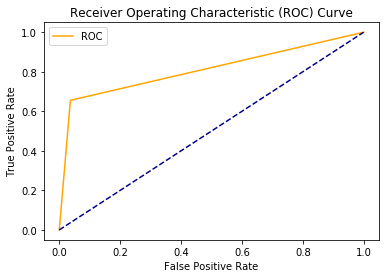

In [0]:
plotting_ac2 =[]
plotting_rec2 =[]

size = [1,10,100]

for y in size:
  overall_recall = 0.0
  overall_accuracy = 0.0
  fpr=0
  tpr=0
  print("---------------- New 5-Fold ------------------")
  for i in range(5):
    pred = SMOTE_Boost(np.array(x_train[i]),y_train[i],np.array(x_test[i]), y)
    ac = accuracy_score(numberize(list(y_test[i])), pred)
    rec = recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
    prec = recall_score(numberize(list(y_test[i])), pred)
    f1 = recall_score(numberize(list(y_test[i])), pred)
    fp, tp, thresholds = roc_curve(numberize(list(y_test[i])), pred)
    print("\nAccuracy for fold ",i, " : ",ac )
    print("Recall for fold ",i, " : ", rec)
    print("Precision for fold ",i, " : ", prec)
    print("F1-Measure for fold ",i, " : ", f1)
    print("----------------------------------")

    fpr = fpr + fp
    tpr = tpr + tp
    overall_recall += recall_score(numberize(list(y_test[i])), pred, average='macro', zero_division=0)
    overall_accuracy += ac
  
  plot_roc_curve(fpr/5, tpr/5)
  plotting_rec2.append(overall_recall/5)
  plotting_ac2.append(overall_accuracy/5)

[0.8120311136958417, 0.8148374042841912, 0.8095749733449648]


<BarContainer object of 3 artists>

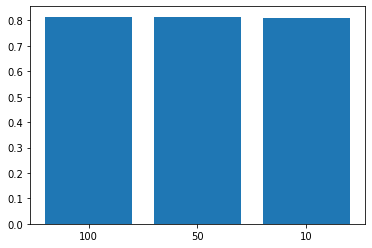

In [0]:
print(plotting_rec2)
plt.bar(['100','50','10'],plotting_rec2)

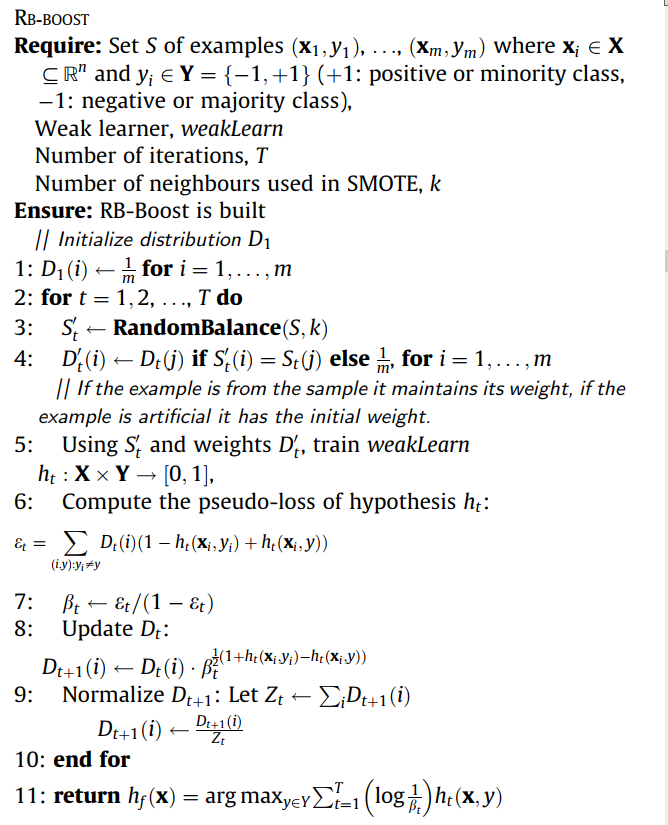